# Baseline Model

### Data Distribution

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
#%matplotlib inline

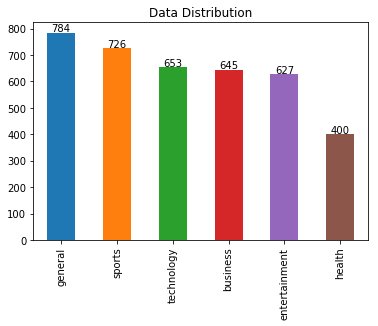

In [53]:
import json
import sys

news_store = list()
with open('./news_baseline.json','r',encoding="utf8") as f :
    ls = f.readlines()
    for l in ls:
        news = json.loads(l)
        #combine sci with tech 
        if(news['category']=="science"):
            news['category']="technology"
        # combine title and description
        # to-dos
        news_store.append(news)

news_store = pd.DataFrame(news_store)
news_store.drop('_id', axis=1, inplace=True)
 
ax =  news_store['category'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 4,
            '{:1.0f}'.format(height),
            ha="center") 
plt.title('Data Distribution')
plt.show()

### Tf-Idf + Logistic Regression

In [114]:
# prepare training and testing data
data = news_store.sample(frac=1.0)
data_test = data[:700]
data_train = data[700:]
X_test_raw = data_test['description']
Y_test = data_test['category']
X_train_raw = data_train['description']
Y_train = data_train['category']

In [158]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support

vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,2))
#clf = LogisticRegression(max_iter=400)
#clf = SVC()
#clf = LinearSVC()
#clf = NuSVC(kernel='linear')
clf = MultinomialNB(fit_prior=False)

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

print('score',clf.score(X_test,Y_test))
print(precision_recall_fscore_support(Y_test, Y_pred, average='macro'))

score 0.784285714286
(0.79472956419688279, 0.77806609132378179, 0.78482797923389125, None)


0.7628571428571429